In [4]:
!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00


In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [13]:
# Step 1: Create a sample dataset
data = pd.DataFrame({
    'GDP': ['High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'High'],
    'Social Support': ['High', 'Medium', 'Low', 'Medium', 'Low', 'High', 'High'],
    'Life Expectancy': ['High', 'High', 'Low', 'Medium', 'Low', 'High', 'Medium'],
    'Freedom': ['Low', 'Medium', 'Low', 'High', 'Medium', 'Low', 'High'],
    'Happiness': ['Happy', 'Unhappy', 'Unhappy', 'Happy', 'Unhappy', 'Happy', 'Happy']
})

In [14]:
# Step 2: Define the Bayesian Network structure
model = BayesianModel([
    ('GDP', 'Happiness'), ('Social Support', 'Happiness'),
    ('Life Expectancy', 'Happiness'), ('Freedom', 'Happiness')
])


In [15]:
# Step 3: Train the model using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)



In [16]:
# Step 4: Perform inference on the Bayesian Network
infer = VariableElimination(model)
result = infer.query(variables=['Happiness'], evidence={'GDP': 'High', 'Social Support': 'Medium'})
print(result)

+--------------------+------------------+
| Happiness          |   phi(Happiness) |
+====================+==================+
| Happiness(Happy)   |           0.5408 |
+--------------------+------------------+
| Happiness(Unhappy) |           0.4592 |
+--------------------+------------------+


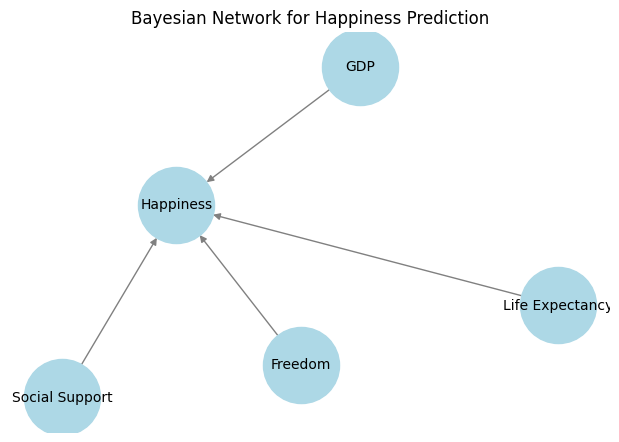

In [17]:
# Step 5: Visualize the Bayesian Network
plt.figure(figsize=(6, 4))
G = nx.DiGraph(model.edges())
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=10)
plt.title("Bayesian Network for Happiness Prediction")
plt.show()
